## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x):
    x_max = np.max(x)
    x_min = np.min(x)
    normal = 2*((x-x_min)/(x_max-x_min))-1
    normal = normal.reshape((len(normal), -1))
    return normal

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preproc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 87us/step - loss: 1.6731 - acc: 0.4081 - val_loss: 1.5238 - val_acc: 0.4639
Epoch 2/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.4510 - acc: 0.4875 - val_loss: 1.4393 - val_acc: 0.4983
Epoch 3/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.3222 - acc: 0.5360 - val_loss: 1.4304 - val_acc: 0.4962
Epoch 4/100
50000/50000 [==============================] - 3s 57us/step - loss: 1.2338 - acc: 0.5666 - val_loss: 1.3831 - val_acc: 0.5179
Epoch 5/100
50000/50000 [==============================] - 3s 60us/step - loss: 1.1395 - acc: 0.6001 - val_loss: 1.4108 - val_acc: 0.51431.1367 - acc: 0.60 - ETA: 0s - loss: 1.1378 - acc: 0.6
Epoch 6/100
50000/50000 [==============================] - 3s 64us/step - loss: 1.0566 - acc: 0.6296 - val_loss: 1.3739 - val_acc: 0.5297
Epoch 7/100
50000/50000 [==============================] - 3s 69us/s

50000/50000 [==============================] - 4s 77us/step - loss: 0.0966 - acc: 0.9675 - val_loss: 3.9424 - val_acc: 0.5240
Epoch 56/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.0986 - acc: 0.9674 - val_loss: 3.9032 - val_acc: 0.5183
Epoch 57/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.1073 - acc: 0.9651 - val_loss: 3.8859 - val_acc: 0.5244
Epoch 58/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.0905 - acc: 0.9712 - val_loss: 4.0376 - val_acc: 0.5300
Epoch 59/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.0840 - acc: 0.9720 - val_loss: 3.9707 - val_acc: 0.5241
Epoch 60/100
50000/50000 [==============================] - 3s 64us/step - loss: 0.0828 - acc: 0.9727 - val_loss: 4.0476 - val_acc: 0.5226
Epoch 61/100
50000/50000 [==============================] - 3s 63us/step - loss: 0.1052 - acc: 0.9656 - val_loss: 4.0152 - val_acc: 0.5281
Epoch 62/100
50000/50000 [==============

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

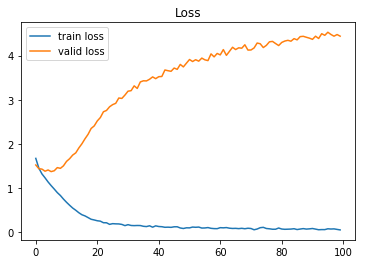

In [11]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

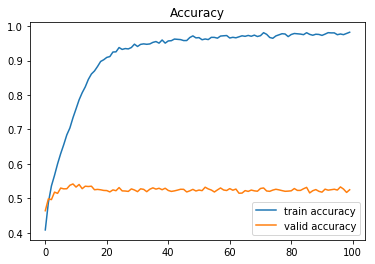

In [12]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()